###### objectif : 
###### is to train a machine learning model to predict whether an individual will purchase the insurance policy from the company or not.


###### Problem  : 
######   1. we want to investigate "what factors/variables affect the purchase of an insurance"
######   2. Make predictions whether a customer will purchase the insurance policy from the company or not based on their                                                             characteristics

In [1]:
pip install pandas-profiling

In [2]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

# Datetime lib
from pandas import to_datetime
import graphviz 
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score,classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
# To change scientific numbers to float


# 1. Loading the Raw Data

In [3]:
# Loading the data
raw_data = pd.read_csv("https://raw.githubusercontent.com/sbelfeki/DM-Project/main/TravelInsurancePrediction.csv")

# print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head(5)

(1987, 10)


,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


# 2. Data Preprocessing

In [4]:
print(raw_data.dtypes)

Unnamed: 0              int64
Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object


In [5]:
# Checking for null values

raw_data.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [6]:
raw_data.drop(columns=["Unnamed: 0"], inplace=True)
raw_data.shape


(1987, 9)

In [7]:
# Investigate all the elements whithin each Feature 
#unique value for each feature

for column in raw_data:
    unique_values = np.unique(raw_data[column])
    nr_values = len(unique_values)
    if nr_values <= 4:
        print("The number of values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, nr_values))

The number of values for feature Age is: 11
The number of values for feature Employment Type is: 2 -- ['Government Sector' 'Private Sector/Self Employed']
The number of values for feature GraduateOrNot is: 2 -- ['No' 'Yes']
The number of values for feature AnnualIncome is: 30
The number of values for feature FamilyMembers is: 8
The number of values for feature ChronicDiseases is: 2 -- [0 1]
The number of values for feature FrequentFlyer is: 2 -- ['No' 'Yes']
The number of values for feature EverTravelledAbroad is: 2 -- ['No' 'Yes']
The number of values for feature TravelInsurance is: 2 -- [0 1]


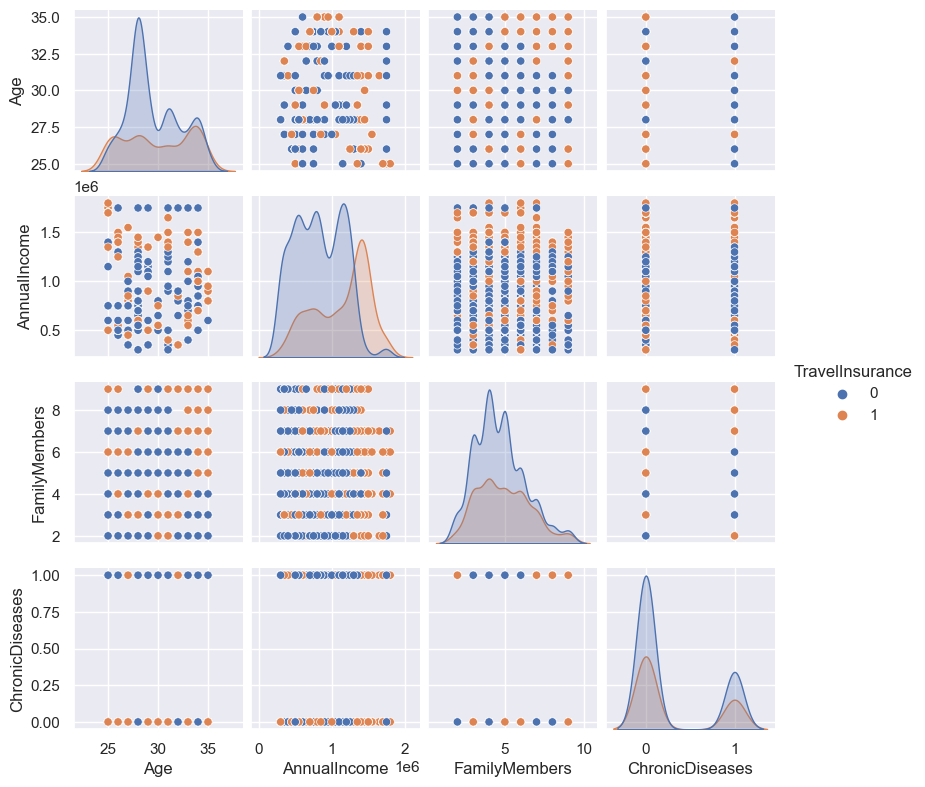

In [8]:
# Visualize the data using seaborn Pairplots

sns.pairplot( raw_data,hue='TravelInsurance', height=2)


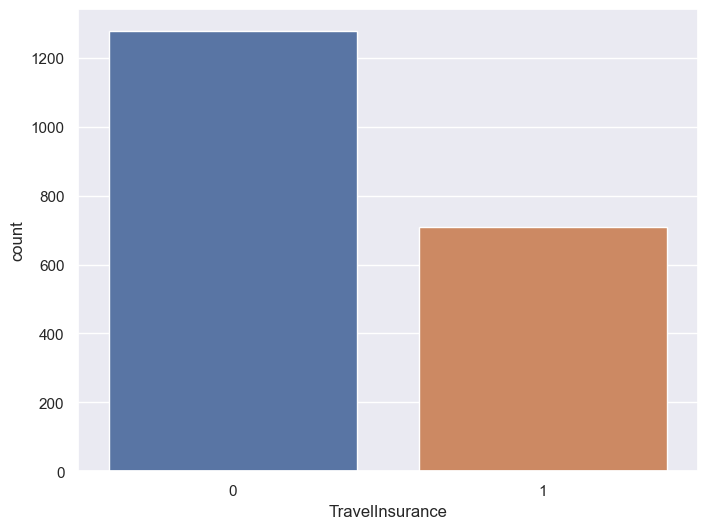

In [9]:
sns.countplot(x='TravelInsurance', data=raw_data )
plt.show()



### Balancing the dataset

In [10]:
raw_data0 = raw_data.loc[raw_data['TravelInsurance']==0]
raw_data1 = raw_data.loc[raw_data['TravelInsurance']==1]

n0 = len(raw_data0)
n1 = len(raw_data1)


#raw_data0 = raw_data0[:n1]

raw_data0 = raw_data0.sample(frac=n1/n0)

print(n0)
print(n1)
print(len(raw_data0))


raw_data = pd.concat([raw_data0,raw_data1])
raw_data = raw_data.sample(frac=1)

raw_data = raw_data.reset_index()

#raw_data = raw_data.drop(
#  ['level_0'], axis=1)

raw_data = raw_data.drop(
  ['index'], axis=1)

print(len(raw_data))


1277
710
710
1420


In [11]:
raw_data

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,No,300000,3,0,No,No,0
1,25,Private Sector/Self Employed,Yes,1400000,3,0,No,Yes,1
2,33,Government Sector,Yes,800000,6,0,No,No,1
3,25,Private Sector/Self Employed,No,1350000,6,0,No,Yes,1
4,28,Private Sector/Self Employed,Yes,1200000,5,0,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1415,31,Government Sector,No,400000,4,1,No,No,0
1416,30,Private Sector/Self Employed,No,1450000,4,1,Yes,Yes,1
1417,31,Private Sector/Self Employed,Yes,1400000,3,0,Yes,Yes,1
1418,31,Government Sector,Yes,1500000,4,1,Yes,Yes,1


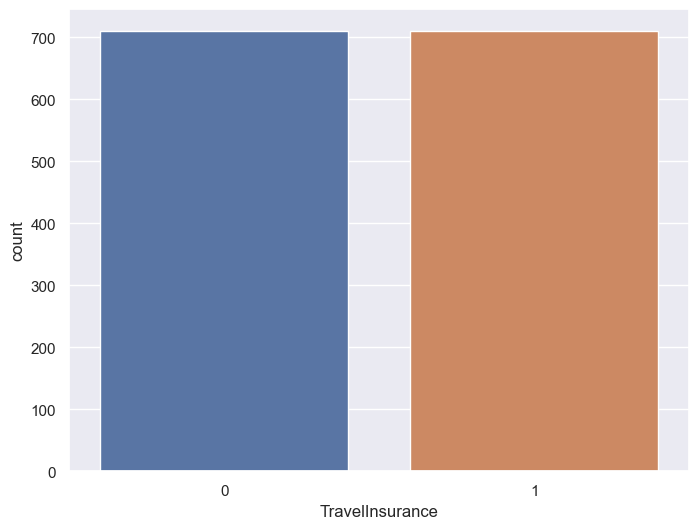

In [12]:
sns.countplot(x='TravelInsurance', data=raw_data )
plt.show()

In [13]:
raw_data.columns

Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

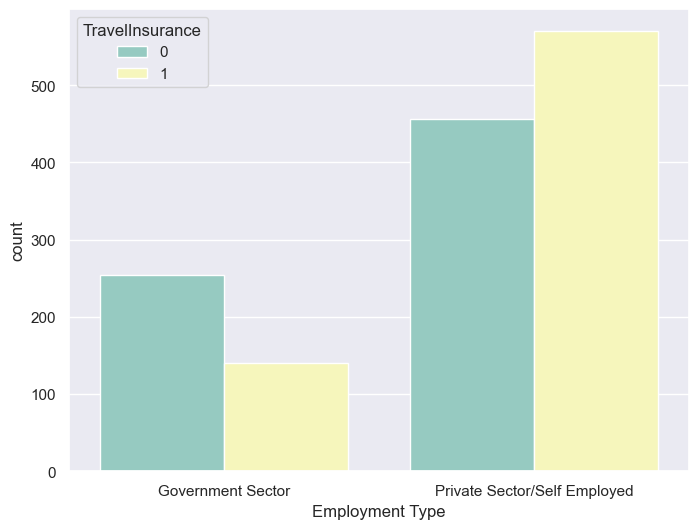

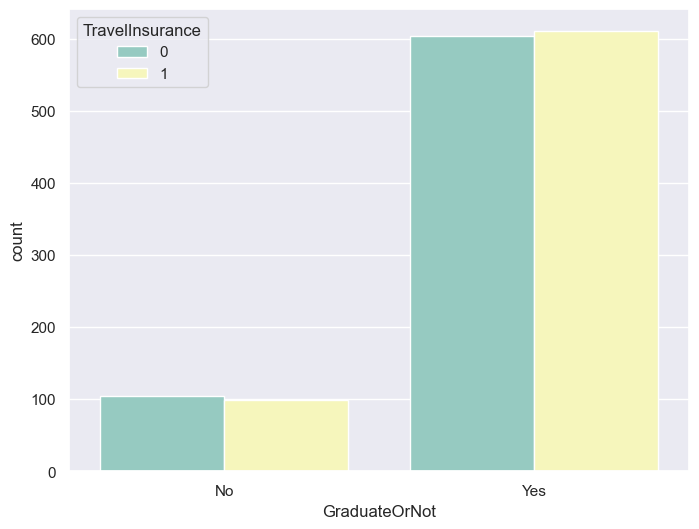

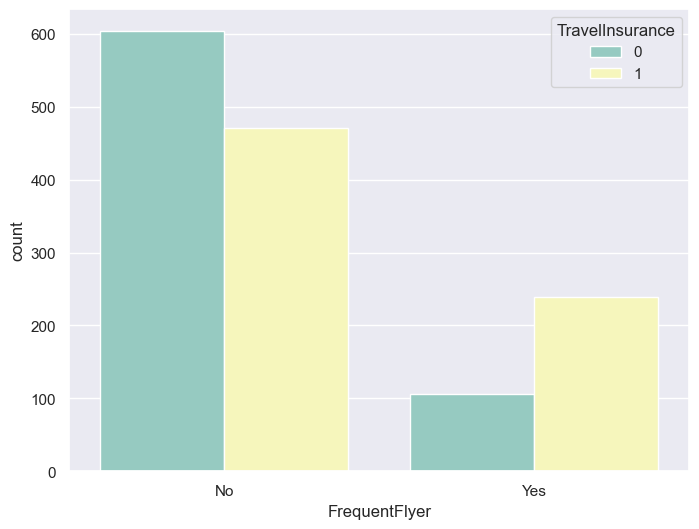

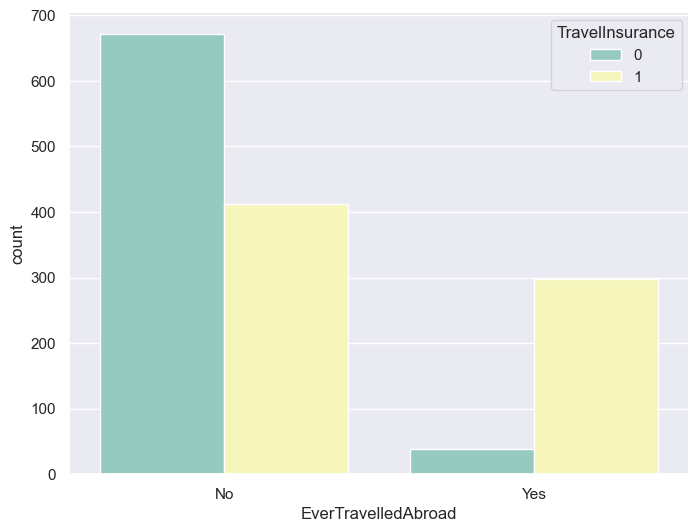

In [14]:
# Looping through all the features by our y variable - see if there is relationship

features = [ 'Employment Type', 'GraduateOrNot'
       , 'FrequentFlyer',
       'EverTravelledAbroad']

for f in features:
   
    sns.countplot(x = f, data = raw_data, palette = 'Set3', hue = 'TravelInsurance')
    plt.show()

In [15]:
raw_data.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,No,300000,3,0,No,No,0
1,25,Private Sector/Self Employed,Yes,1400000,3,0,No,Yes,1
2,33,Government Sector,Yes,800000,6,0,No,No,1
3,25,Private Sector/Self Employed,No,1350000,6,0,No,Yes,1
4,28,Private Sector/Self Employed,Yes,1200000,5,0,Yes,No,0


In [16]:
# Making categorical variables into numeric representation

#new_raw_data = pd.get_dummies(raw_data, columns = features)
raw_data["GraduateOrNot"] = raw_data["GraduateOrNot"].map({"No": 0, "Yes": 1})
raw_data["FrequentFlyer"] = raw_data["FrequentFlyer"].map({"No": 0, "Yes": 1})
raw_data["EverTravelledAbroad"] = raw_data["EverTravelledAbroad"].map({"No": 0, "Yes": 1})
raw_data["Employment Type"] = raw_data["Employment Type"].map({"Government Sector": 0, "Private Sector/Self Employed": 1})
  

In [17]:
raw_data.head(5)
raw_data.dtypes

Age                    int64
Employment Type        int64
GraduateOrNot          int64
AnnualIncome           int64
FamilyMembers          int64
ChronicDiseases        int64
FrequentFlyer          int64
EverTravelledAbroad    int64
TravelInsurance        int64
dtype: object

In [18]:
#EDA using pandas-profiling
profile = ProfileReport(pd.read_csv('C:\DM-ML\TravelInsurancePrediction.csv'), explorative=True)

#Saving results to a HTML file
profile.to_file("output.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
type(raw_data.drop)

method

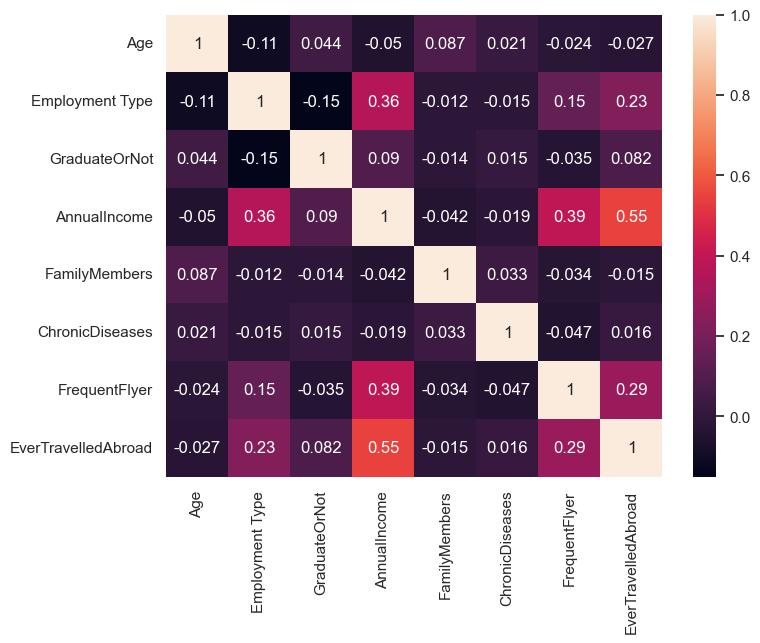

In [20]:
sns.heatmap(raw_data.corr(method='pearson').drop(
  ['TravelInsurance'], axis=0).drop(
  ['TravelInsurance'], axis=1),
            annot = True);
  
plt.show()

In [21]:
# Scaling our columns

scale_vars = ["Age","AnnualIncome","FamilyMembers"]
scaler = MinMaxScaler()
raw_data[scale_vars] = scaler.fit_transform(raw_data[scale_vars])
raw_data.head()



,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0.6,0,0,0.000000,0.142857,0,0,0,0
1,0.0,1,1,0.733333,0.142857,0,0,1,1
2,0.8,0,1,0.333333,0.571429,0,0,0,1
3,0.0,1,0,0.700000,0.571429,0,0,1,1
4,0.3,1,1,0.600000,0.428571,0,1,0,0


# 6. Splitting the Raw Data 

In [22]:
# Split the data into X & y



#data = new_raw_data.iloc[:,[0,1,2,3,5,6,7,8,9,10,11,12]]



#res= new_raw_data.iloc[:,[4]]


#print(data.shape)
#print(res.shape)

X = raw_data.drop('TravelInsurance', axis=1).values
X

y = raw_data['TravelInsurance']
y = y.astype(int)
y

print(X.shape)
print(y.shape)



(1420, 8)
(1420,)


In [23]:
# Hold-out validation

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

# Second one
#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

print(X_train.shape)
print(X_test.shape)
#print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
#print(y_valid.shape)





(1136, 8)
(284, 8)
(1136,)
(284,)


# 7. Running Logistic Regression

In [24]:
# Training my model

log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')

log_reg.fit(X_train, y_train)


LogisticRegression(random_state=10)

In [25]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

# score- Returns the mean accuracy on the given test data and labels - below

#for i in range(0,len(y_pred)): 
 #   print(y_pred[i]) 


# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train)
pred_proba

array([[0.588739, 0.411261],
       [0.511687, 0.488313],
       [0.089885, 0.910115],
       ...,
       [0.384633, 0.615367],
       [0.440562, 0.559438],
       [0.888504, 0.111496]])

# 9. Evaluating the Model

#accuracy is the degree of how close a calculated or measured value is to the actual value. It measures the statistical error, which is the difference between the measured value and the actual value

In [26]:
# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))

# compute accuracy of the model
log_reg.score(X_test, y_test)
print("The  Accuracy is: ", log_reg.score(X_test, y_test))

# Classification Report
print(classification_report(y_train, y_pred))
y_pred

The Training Accuracy is:  0.7297535211267606
The Testing Accuracy is:  0.6830985915492958
The  Accuracy is:  0.6830985915492958
              precision    recall  f1-score   support

           0       0.69      0.84      0.76       573
           1       0.79      0.62      0.70       563

    accuracy                           0.73      1136
   macro avg       0.74      0.73      0.73      1136
weighted avg       0.74      0.73      0.73      1136



array([0, 0, 1, ..., 1, 1, 0])

In [27]:
#hyperamatres a faire jouer 
#penality
#regulation c
from sklearn.model_selection import GridSearchCV
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : [0.01,0.1,1.0,10.0,100.0],
    'solver'  : ['lbfgs', 'liblinear'],
}
#grid search
grid=GridSearchCV(estimator=log_reg,param_grid=parameters,scoring='accuracy',cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=10),
             param_grid={'C': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

In [28]:
print("Tuned Hyperparameters :", grid.best_params_)
print("Accuracy :",grid.best_score_)

Tuned Hyperparameters : {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy : 0.7254075454122031


### Running Decision Tree

In [29]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)
dt.fit(X_train, y_train)
dt.get_params()
# Doc:https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [30]:
!pip install graphviz 

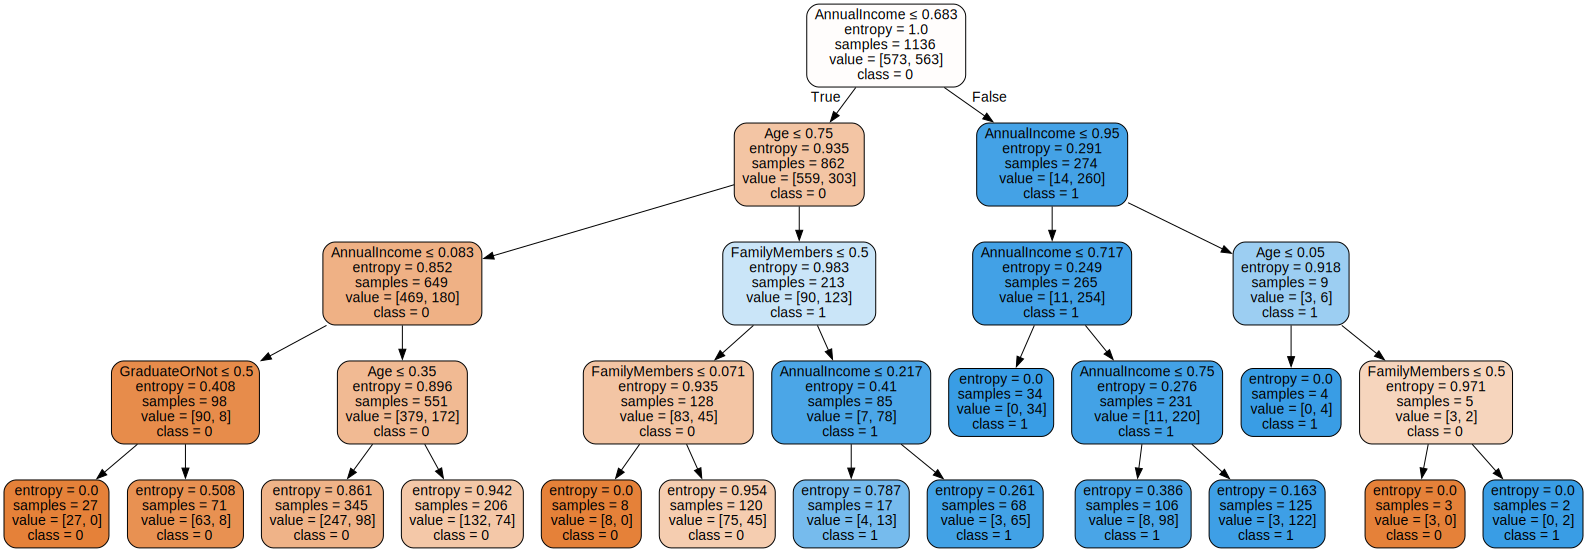

In [31]:

dot_data = tree.export_graphviz(dt, out_file=None, 
    feature_names=raw_data.drop('TravelInsurance', axis=1).columns,    
    class_names=raw_data['TravelInsurance'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [32]:
#del final_fi

# Calculating FI
for i, column in enumerate(raw_data.drop('TravelInsurance', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature Age:, 0.125
Importance of feature Employment Type:, 0.000
Importance of feature GraduateOrNot:, 0.010
Importance of feature AnnualIncome:, 0.705
Importance of feature FamilyMembers:, 0.161
Importance of feature ChronicDiseases:, 0.000
Importance of feature FrequentFlyer:, 0.000
Importance of feature EverTravelledAbroad:, 0.000


,index,Variable,Feature Importance Score
0,3,AnnualIncome,0.704638
1,4,FamilyMembers,0.161108
2,0,Age,0.124519
3,2,GraduateOrNot,0.009734
4,1,Employment Type,0.000000
5,5,ChronicDiseases,0.000000
6,6,FrequentFlyer,0.000000
7,7,EverTravelledAbroad,0.000000


In [33]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_train, y_train))

# Accuracy on Train
print("Testing Accuracy is: ", dt.score(X_test, y_test))
# Classification Report
print(classification_report(y_train, y_pred))


Training Accuracy is:  0.7860915492957746
Testing Accuracy is:  0.7640845070422535
              precision    recall  f1-score   support

           0       0.69      0.84      0.76       573
           1       0.79      0.62      0.70       563

    accuracy                           0.73      1136
   macro avg       0.74      0.73      0.73      1136
weighted avg       0.74      0.73      0.73      1136



In [34]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Confusion matrix

### Logistic regression

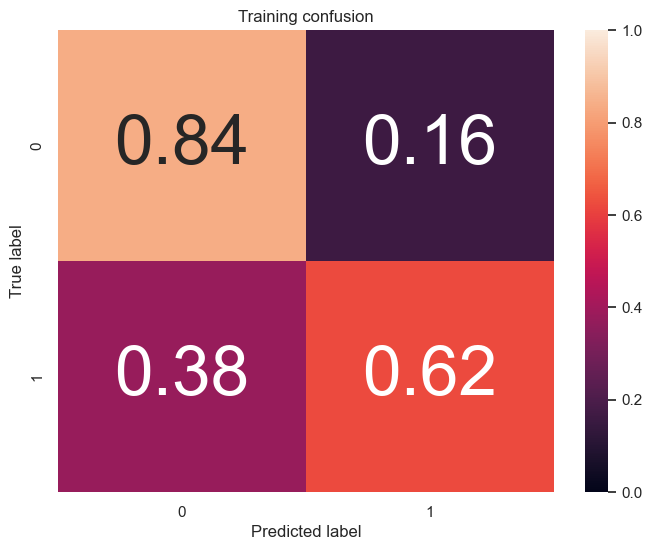

In [35]:
y_pred = log_reg.predict(X_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Training confusion')



### Decision tree

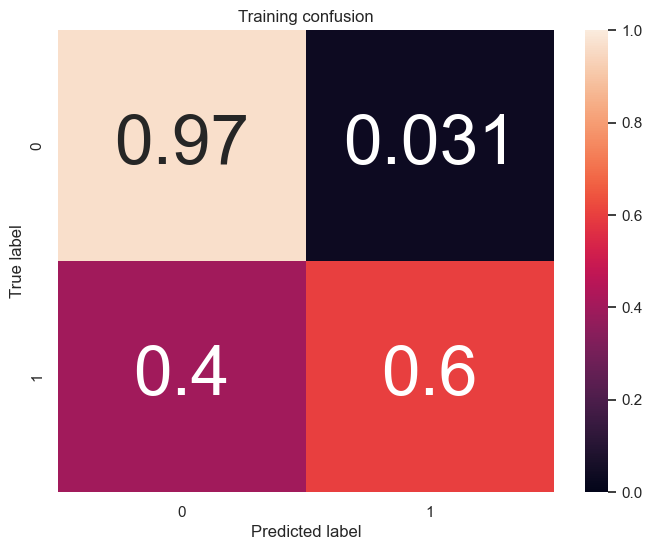

In [36]:
y_pred = dt.predict(X_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Training confusion')

# calculate the ROC and AUC for decision tree

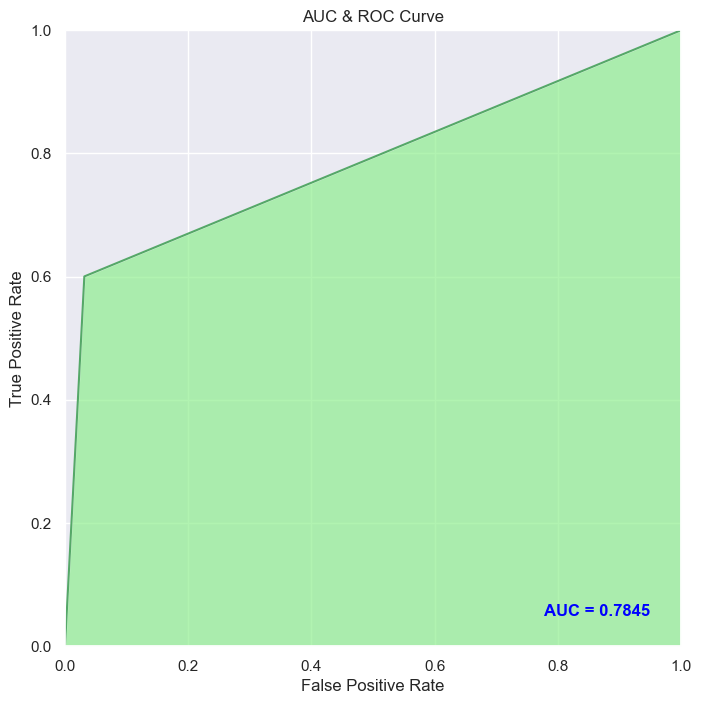

In [37]:
 from sklearn import metrics
y_pred = dt.predict(X_train)
auc = metrics.roc_auc_score(y_train, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_train, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


# calculate the ROC and AUC for logistic regression

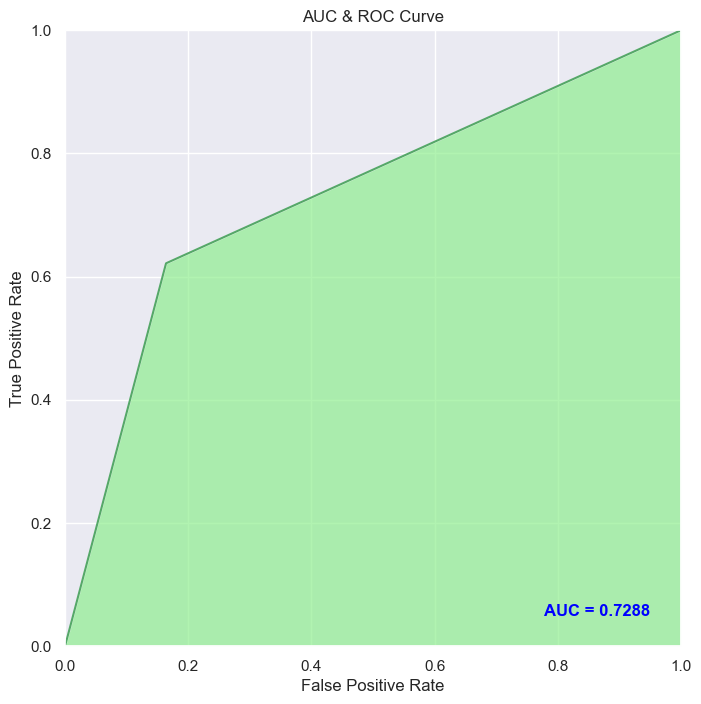

In [38]:
from sklearn import metrics
y_pred = log_reg.predict(X_train)
auc = metrics.roc_auc_score(y_train, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_train, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()